# MLR

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## EDA

In [3]:
data_cars = pd.read_csv("/Users/utkarshhajare/DS material/Assignements/Linear Regression/ToyotaCorolla - MLR.csv")

In [4]:
data_cars

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [5]:
data_cars.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


### Separating continues & numerical data

**Here continues data is**
1. KM
2. Weight
3. Price

**Categorical is**
One thing also can be notable is except KM & Price, in my opinion, all the values are categorical and pre-fixed by company because we can'r modify cc, Cylinders, Gears, HP & Automatic. Talking about age, age is taught as categorical in class.

In [6]:
data_cars_continues = data_cars[['Price','KM', 'Weight']]
data_cars_continues

,Price,KM,Weight
0,13500,46986,1165
1,13750,72937,1165
2,13950,41711,1165
3,14950,48000,1165
4,13750,38500,1170
...,...,...,...
1431,7500,20544,1025
1432,10845,19000,1015
1433,8500,17016,1015
1434,7250,16916,1015


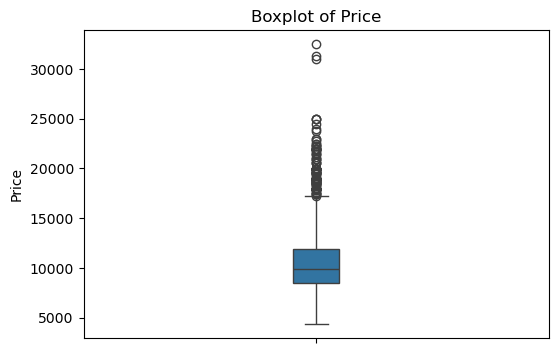

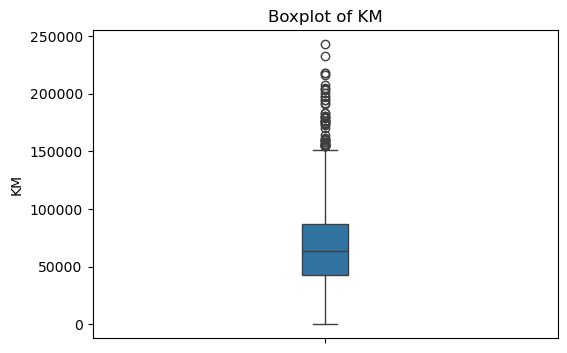

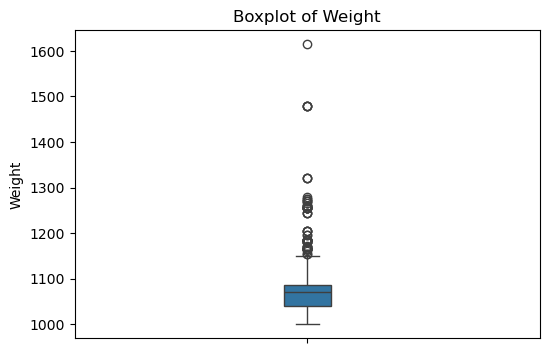

In [7]:
for i in data_cars_continues.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data_cars[i], width=0.1)
    plt.title(f"Boxplot of {i}")
    plt.tight_layout

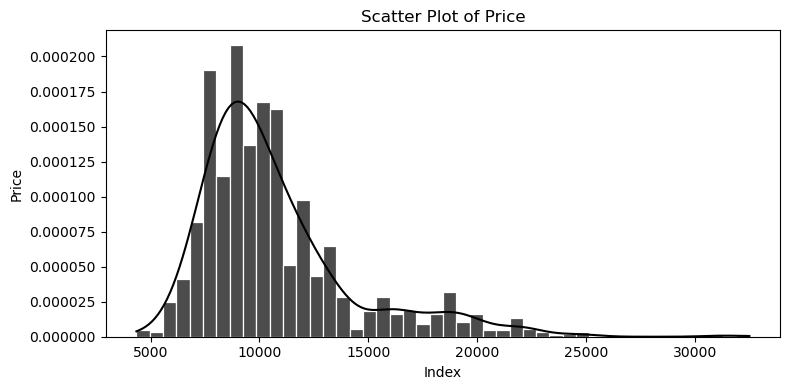

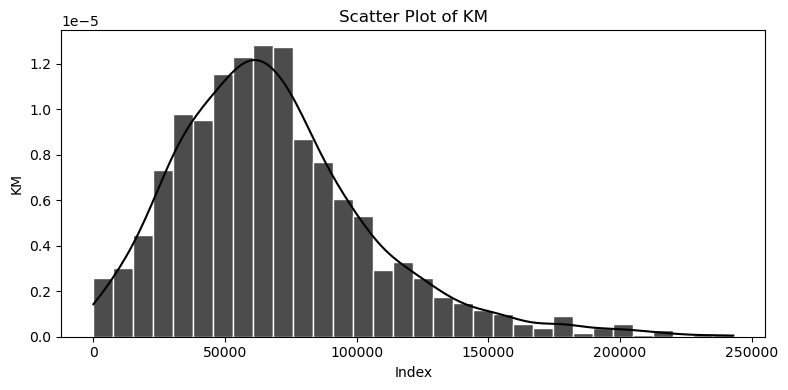

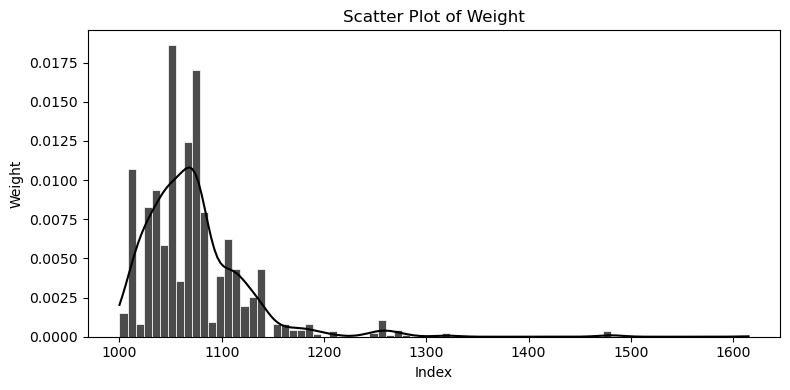

In [8]:
for col1 in data_cars_continues.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data_cars_continues[col1], 
                 kde=True, color='black',
                 edgecolor='white',
                 alpha=0.7,
                 stat='density')
    plt.title(f"Scatter Plot of {col1}")
    plt.xlabel("Index")
    plt.ylabel(col1)
    plt.tight_layout()
    plt.show()

In [9]:
data_cars_continues_norm = MinMaxScaler().fit_transform(data_cars_continues)
data_cars_continues_norm_df = pd.DataFrame(data_cars_continues_norm, columns=data_cars_continues.columns, index=data_cars_continues.index)
data_cars_continues_norm_df

,Price,KM,Weight
0,0.325044,0.193355,0.268293
1,0.333925,0.300149,0.268293
2,0.341030,0.171647,0.268293
3,0.376554,0.197528,0.268293
4,0.333925,0.158433,0.276423
...,...,...,...
1431,0.111901,0.084539,0.040650
1432,0.230728,0.078186,0.024390
1433,0.147425,0.070021,0.024390
1434,0.103020,0.069609,0.024390


In [10]:
data_cars_dropContinues = data_cars.drop(columns=['Price','KM','Weight'])
data_cars_dropContinues

,Age_08_04,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears
0,23,Diesel,90,0,2000,3,4,5
1,23,Diesel,90,0,2000,3,4,5
2,24,Diesel,90,0,2000,3,4,5
3,26,Diesel,90,0,2000,3,4,5
4,30,Diesel,90,0,2000,3,4,5
...,...,...,...,...,...,...,...,...
1431,69,Petrol,86,0,1300,3,4,5
1432,72,Petrol,86,0,1300,3,4,5
1433,71,Petrol,86,0,1300,3,4,5
1434,70,Petrol,86,0,1300,3,4,5


In [11]:
data_cars_norm = pd.concat([data_cars_dropContinues, data_cars_continues_norm_df], axis=1)
data_cars_norm

,Age_08_04,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Price,KM,Weight
0,23,Diesel,90,0,2000,3,4,5,0.325044,0.193355,0.268293
1,23,Diesel,90,0,2000,3,4,5,0.333925,0.300149,0.268293
2,24,Diesel,90,0,2000,3,4,5,0.341030,0.171647,0.268293
3,26,Diesel,90,0,2000,3,4,5,0.376554,0.197528,0.268293
4,30,Diesel,90,0,2000,3,4,5,0.333925,0.158433,0.276423
...,...,...,...,...,...,...,...,...,...,...,...
1431,69,Petrol,86,0,1300,3,4,5,0.111901,0.084539,0.040650
1432,72,Petrol,86,0,1300,3,4,5,0.230728,0.078186,0.024390
1433,71,Petrol,86,0,1300,3,4,5,0.147425,0.070021,0.024390
1434,70,Petrol,86,0,1300,3,4,5,0.103020,0.069609,0.024390


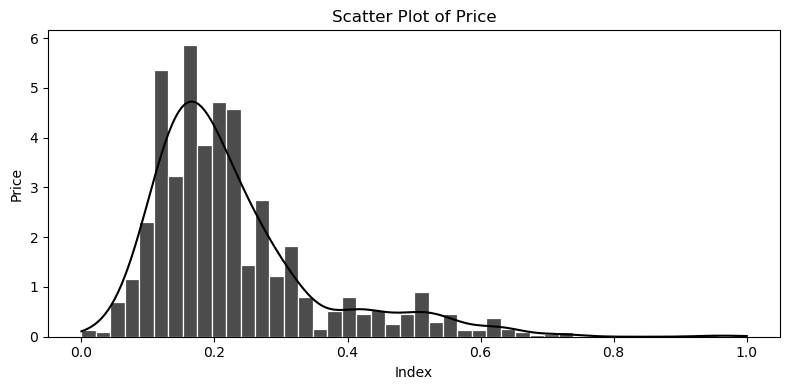

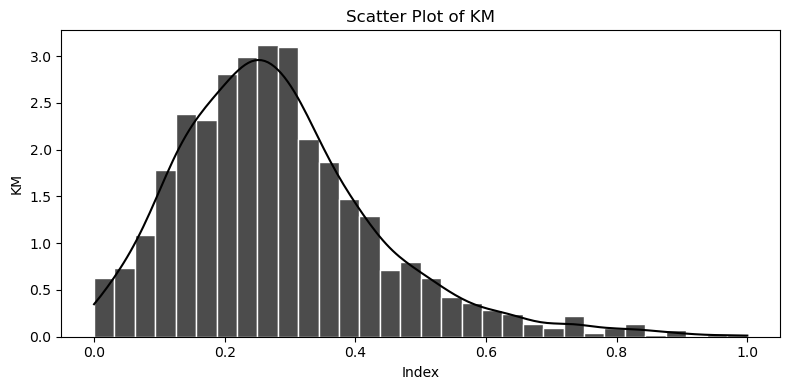

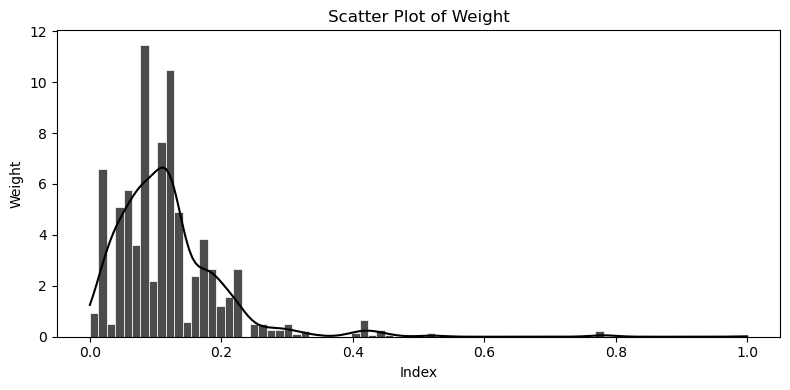

In [12]:
for col2 in data_cars_continues_norm_df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data_cars_continues_norm_df[col2], 
                 kde=True, color='black',
                 edgecolor='white',
                 alpha=0.7,
                 stat='density')
    plt.title(f"Scatter Plot of {col2}")
    plt.xlabel("Index")
    plt.ylabel(col2)
    plt.tight_layout()
    plt.show()

**To work on rightly skewed data lets apply log transformation**

In [13]:
data_cars_continues_log = np.log1p(data_cars_continues)
data_cars_continues_log

,Price,KM,Weight
0,9.510519,10.757626,7.061334
1,9.528867,11.197365,7.061334
2,9.543306,10.638544,7.061334
3,9.612533,10.778977,7.061334
4,9.528867,10.558439,7.065613
...,...,...,...
1431,8.922792,9.930373,6.933423
1432,9.291552,9.852247,6.923629
1433,9.047939,9.741968,6.923629
1434,8.888895,9.736074,6.923629


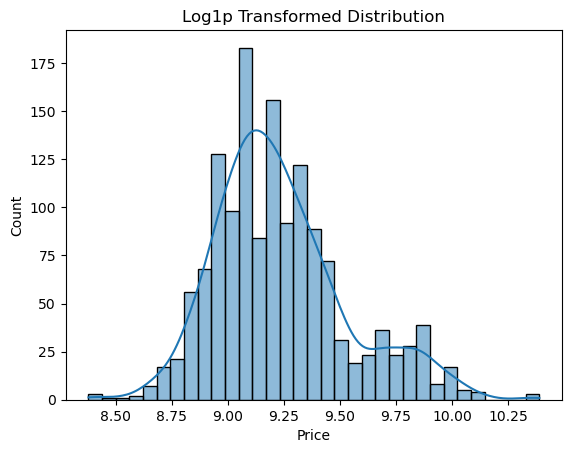

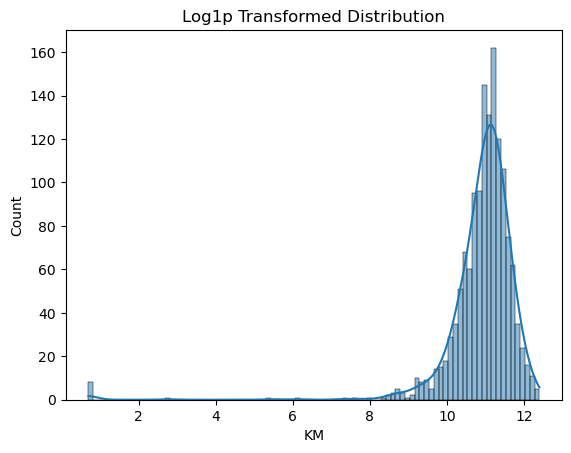

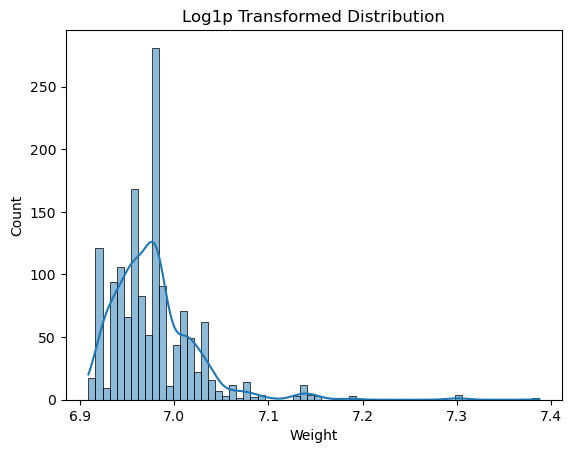

In [14]:
for col3 in data_cars_continues_log.columns:
    sns.histplot(data_cars_continues_log[col3], kde=True)
    plt.title("Log1p Transformed Distribution")
    plt.show()

In [15]:
data_cars_normlog = pd.concat([data_cars_dropContinues, data_cars_continues_log], axis=1)
data_cars_normlog

,Age_08_04,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Price,KM,Weight
0,23,Diesel,90,0,2000,3,4,5,9.510519,10.757626,7.061334
1,23,Diesel,90,0,2000,3,4,5,9.528867,11.197365,7.061334
2,24,Diesel,90,0,2000,3,4,5,9.543306,10.638544,7.061334
3,26,Diesel,90,0,2000,3,4,5,9.612533,10.778977,7.061334
4,30,Diesel,90,0,2000,3,4,5,9.528867,10.558439,7.065613
...,...,...,...,...,...,...,...,...,...,...,...
1431,69,Petrol,86,0,1300,3,4,5,8.922792,9.930373,6.933423
1432,72,Petrol,86,0,1300,3,4,5,9.291552,9.852247,6.923629
1433,71,Petrol,86,0,1300,3,4,5,9.047939,9.741968,6.923629
1434,70,Petrol,86,0,1300,3,4,5,8.888895,9.736074,6.923629


### Spliting of Data
Now we've done with EDA. Lets split the data into training and test

In [16]:
from sklearn.model_selection import train_test_split
X = data_cars_normlog.drop('Price', axis=1)
y = data_cars_normlog['Price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
data_cars_trainset = pd.concat([y_train, X_train], axis=1).reset_index(drop=True)
data_cars_trainset

,Price,Age_08_04,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,KM,Weight
0,9.159152,62,Petrol,86,0,1300,5,4,5,10.990297,6.943122
1,9.189729,68,Petrol,110,0,1600,4,4,5,11.027914,6.943122
2,9.468928,40,Petrol,110,0,1600,5,4,5,10.562406,6.985642
3,8.771990,75,Petrol,110,0,1600,5,4,5,11.531315,6.976348
4,9.664659,22,Petrol,97,0,1400,3,4,5,10.468801,7.003974
...,...,...,...,...,...,...,...,...,...,...,...
1143,8.839422,76,Petrol,110,0,1600,3,4,5,11.742282,6.957497
1144,8.981053,73,Petrol,110,0,1600,3,4,5,11.581602,6.957497
1145,8.846641,80,Petrol,110,0,1600,5,4,5,11.180818,6.976348
1146,9.185125,63,Petrol,86,0,1300,3,4,5,11.077377,6.928538


### Building 3 models
**1st model**

<Axes: >

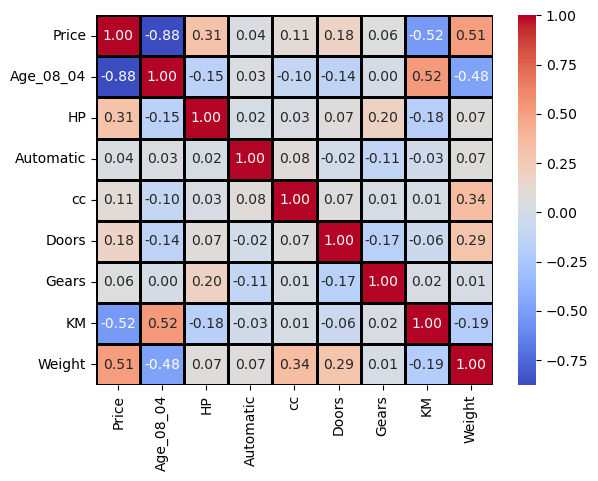

In [18]:
sns.heatmap(data_cars_trainset.select_dtypes(include=['number']).drop(columns=['Cylinders']).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=1, linecolor='black')

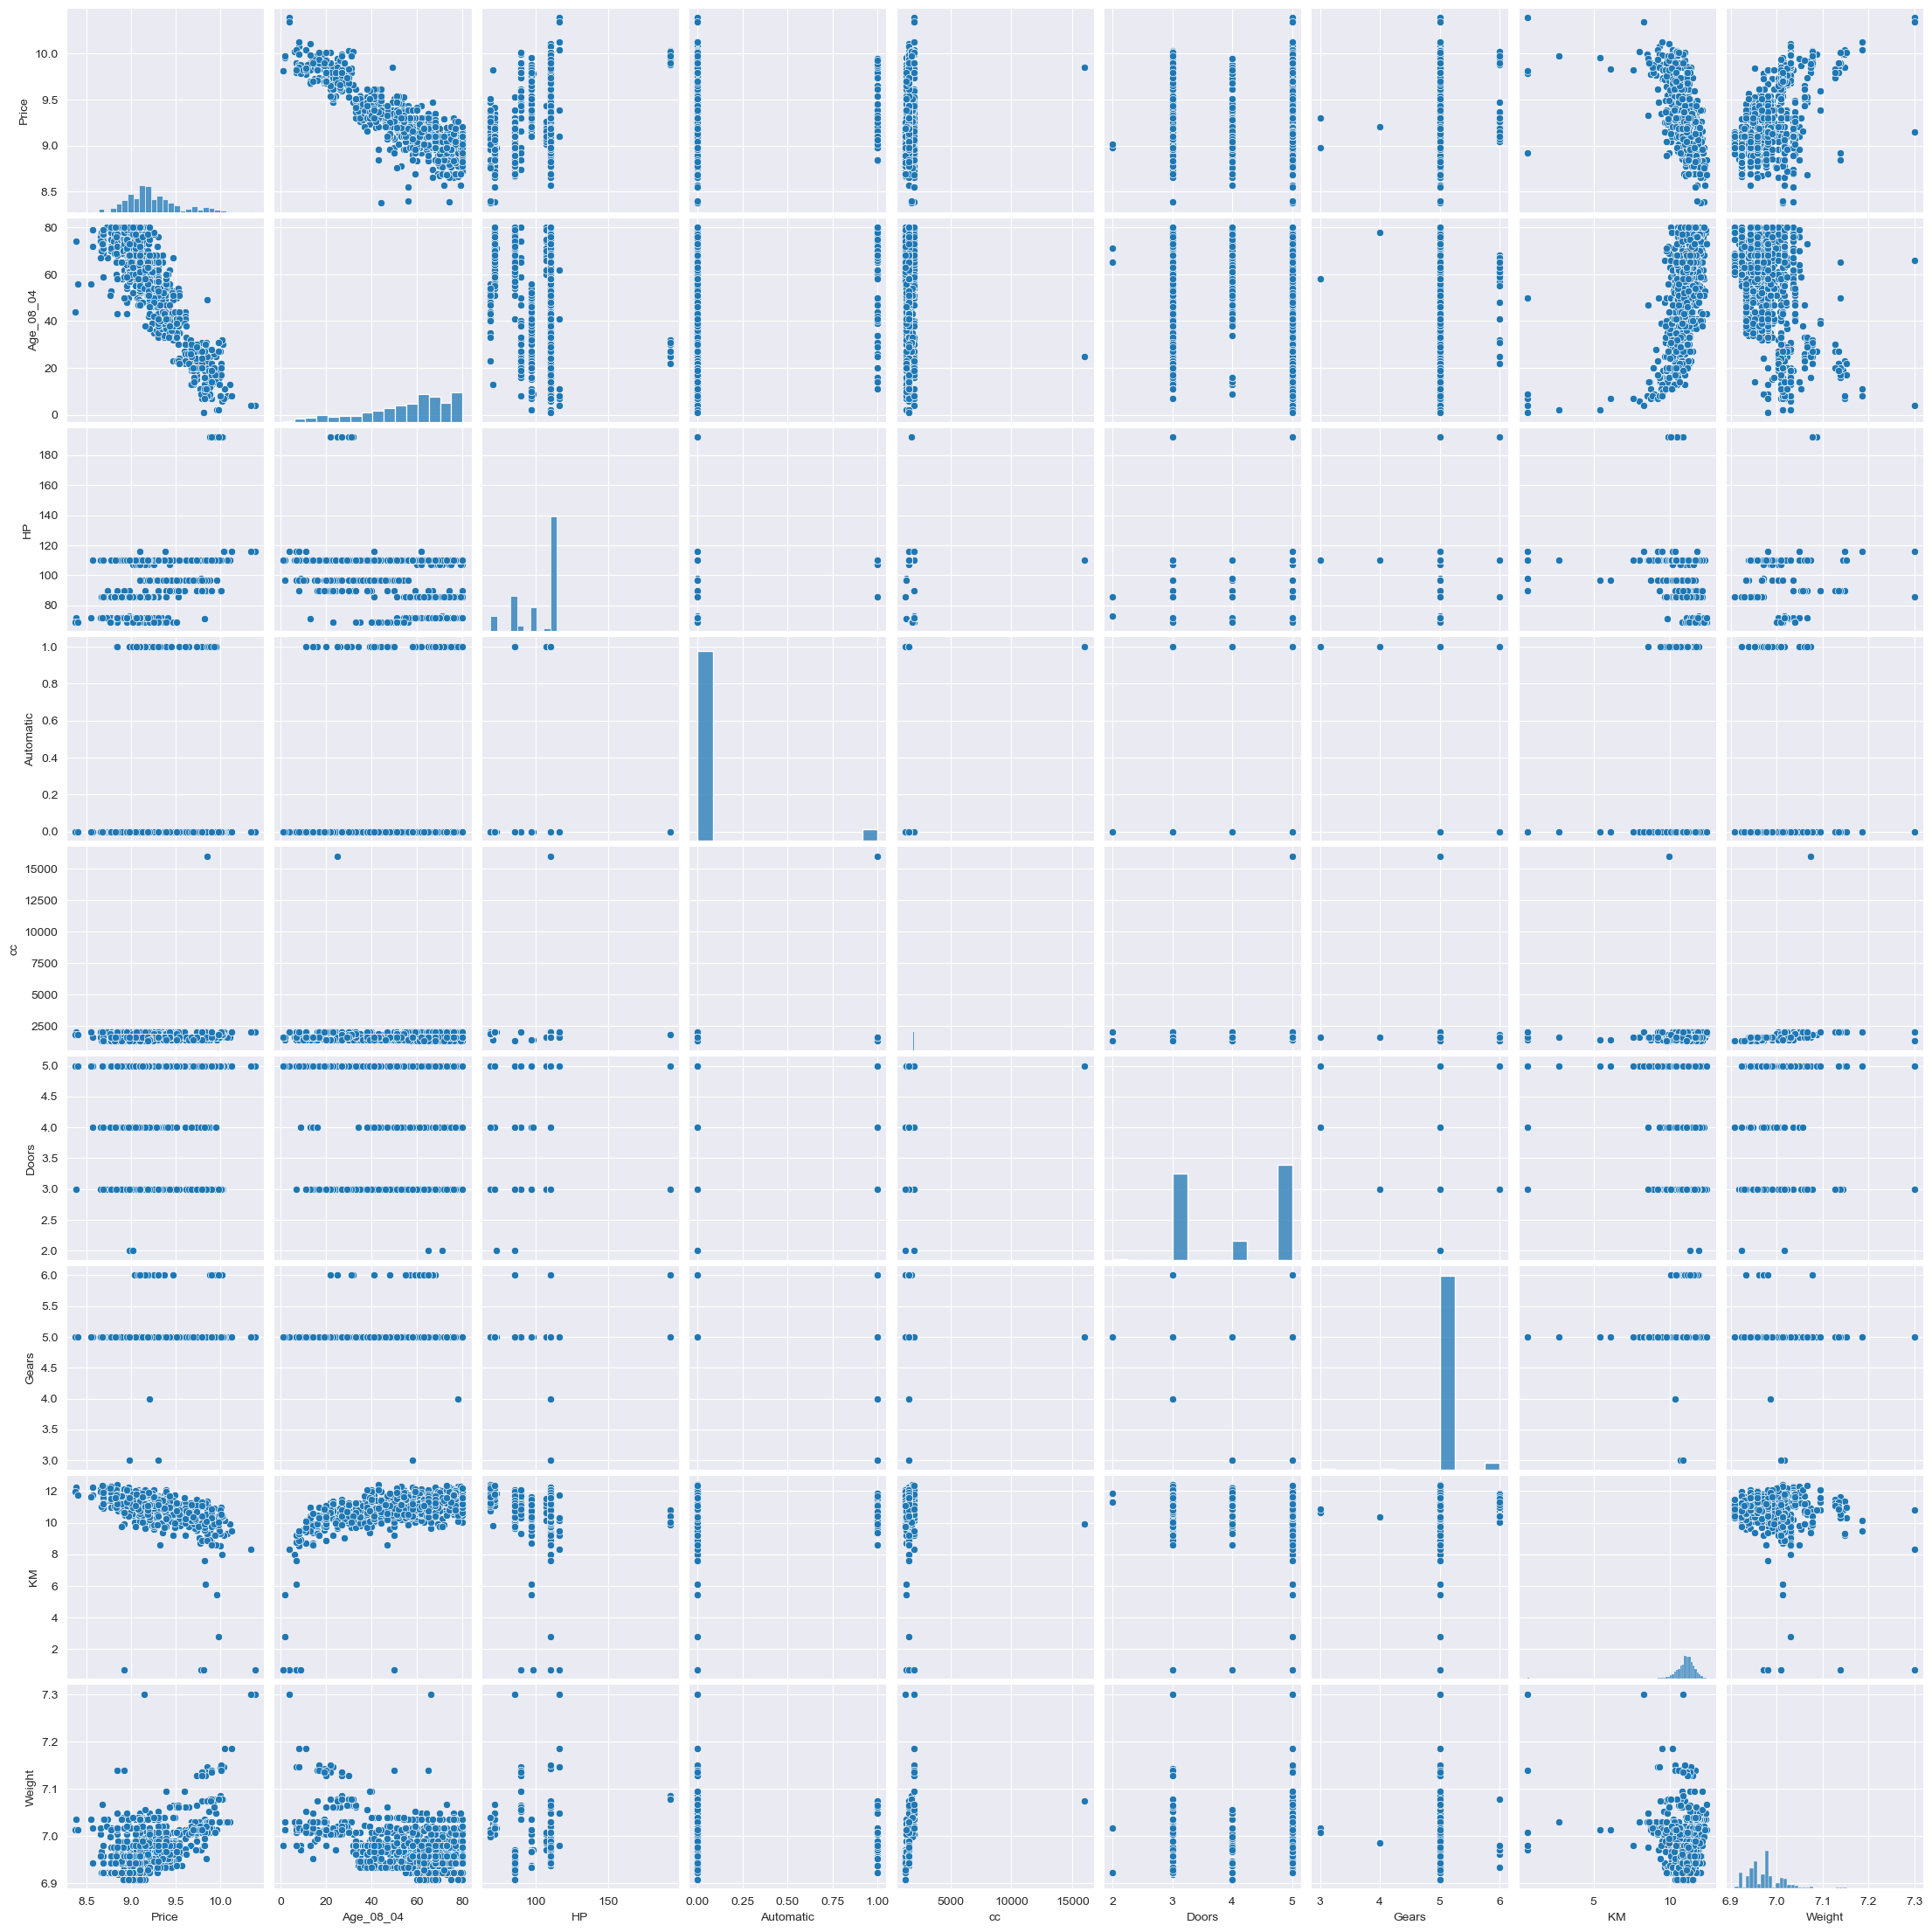

In [19]:
sns.set_style(style='darkgrid')
sns.pairplot(data_cars_trainset.select_dtypes(include=['number']).drop(columns=['Cylinders']))

In [20]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Cylinders+Gears+Weight', data=data_cars_trainset.select_dtypes(include=['number'])).fit()

In [21]:
model.params

Intercept    0.240998
Age_08_04   -0.011984
KM          -0.020613
HP           0.003155
Automatic    0.074432
cc          -0.000012
Doors        0.011091
Cylinders    0.963990
Gears        0.064827
Weight       0.767695
dtype: float64

In [22]:
print(pd.DataFrame({
    "t-value":model.tvalues,
    "p-value":model.pvalues
}))

             t-value        p-value
Intercept   5.642034   2.119269e-08
Age_08_04 -45.360129  1.753292e-257
KM         -4.710461   2.776024e-06
HP         11.970270   3.460154e-31
Automatic   4.521411   6.784764e-06
cc         -1.358741   1.744976e-01
Doors       2.638068   8.451635e-03
Cylinders   5.642034   2.119269e-08
Gears       3.272149   1.099356e-03
Weight      7.338614   4.093471e-13


As all p-values are less than 0.5 hence we're rejecting H1. Which means all the features are important for us to predict dependent variable

In [23]:
print(model.rsquared, model.rsquared_adj)

0.8192147603259973 0.8179449781333792


In [24]:
data_cars_trainset.select_dtypes(include=['number']).drop(columns=['Cylinders']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1148 non-null   float64
 1   Age_08_04  1148 non-null   int64  
 2   HP         1148 non-null   int64  
 3   Automatic  1148 non-null   int64  
 4   cc         1148 non-null   int64  
 5   Doors      1148 non-null   int64  
 6   Gears      1148 non-null   int64  
 7   KM         1148 non-null   float64
 8   Weight     1148 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 80.8 KB


**VIF values**

In [25]:
pd.DataFrame({
    "Variables":['Ages_08_04', 'KM', 'HP','Automatic', 'cc', 'Doors', 'Gears', 'Weight'],
    "VIF":[1/(1-smf.ols('Age_08_04~KM+HP+Automatic+cc+Doors+Gears+Weight', data=data_cars_trainset.select_dtypes(include=['number']).drop(columns=['Cylinders'])).fit().rsquared), 
            1/(1-smf.ols('KM~Age_08_04+HP+Automatic+cc+Doors+Gears+Weight', data=data_cars_trainset.select_dtypes(include=['number']).drop(columns=['Cylinders'])).fit().rsquared),
            1/(1-smf.ols('HP~Age_08_04+KM+Automatic+cc+Doors+Gears+Weight', data=data_cars_trainset.select_dtypes(include=['number']).drop(columns=['Cylinders'])).fit().rsquared),
            1/(1-smf.ols('Automatic~Age_08_04+HP+KM+cc+Doors+Gears+Weight', data=data_cars_trainset.select_dtypes(include=['number']).drop(columns=['Cylinders'])).fit().rsquared),
            1/(1-smf.ols('cc~Age_08_04+HP+Automatic+KM+Doors+Gears+Weight', data=data_cars_trainset.select_dtypes(include=['number']).drop(columns=['Cylinders'])).fit().rsquared),
            1/(1-smf.ols('Doors~Age_08_04+HP+Automatic+cc+KM+Gears+Weight', data=data_cars_trainset.select_dtypes(include=['number']).drop(columns=['Cylinders'])).fit().rsquared),
            1/(1-smf.ols('Gears~Age_08_04+HP+Automatic+cc+Doors+KM+Weight', data=data_cars_trainset.select_dtypes(include=['number']).drop(columns=['Cylinders'])).fit().rsquared),
            1/(1-smf.ols('Weight~Age_08_04+HP+Automatic+cc+Doors+Gears+KM', data=data_cars_trainset.select_dtypes(include=['number']).drop(columns=['Cylinders'])).fit().rsquared)]
})

,Variables,VIF
0,Ages_08_04,1.762244
1,KM,1.421589
2,HP,1.097272
3,Automatic,1.037959
4,cc,1.147347
5,Doors,1.150730
6,Gears,1.105890
7,Weight,1.594081


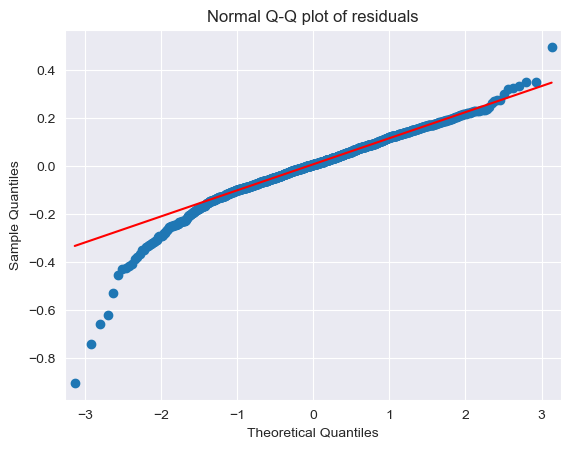

In [26]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid, line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [27]:
print(list(np.where(model.resid>0.4)))
print(list(np.where(model.resid<-0.4)))

[array([345])]
[array([  20,   22,  413,  669,  673,  691,  935,  940, 1057, 1112])]


Text(0, 0.5, 'Standardized residual values')

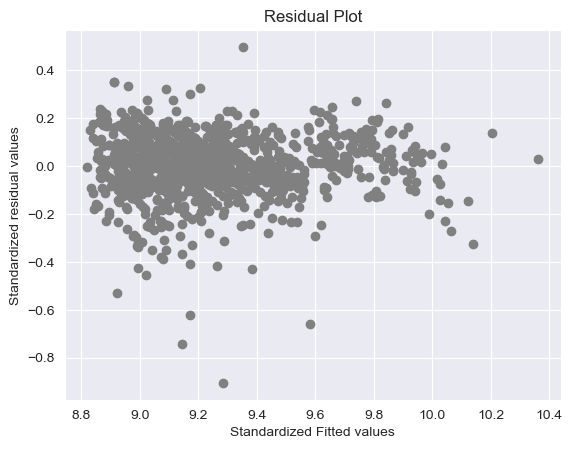

In [28]:
plt.scatter(model.fittedvalues, model.resid, color='grey')
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')

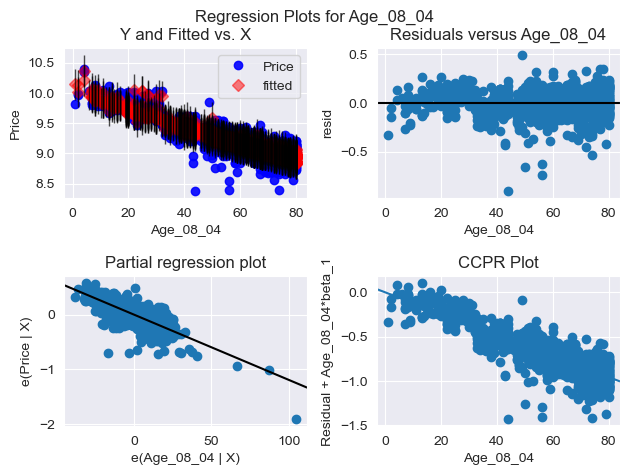

In [29]:
sm.graphics.plot_regress_exog(model, "Age_08_04")
plt.show()

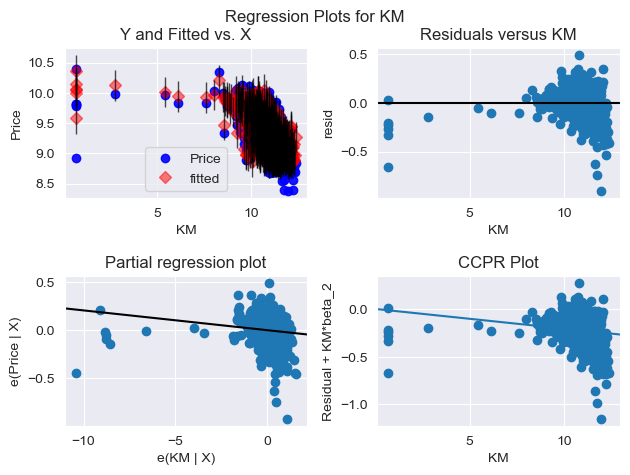

In [30]:
sm.graphics.plot_regress_exog(model, "KM")
plt.show()

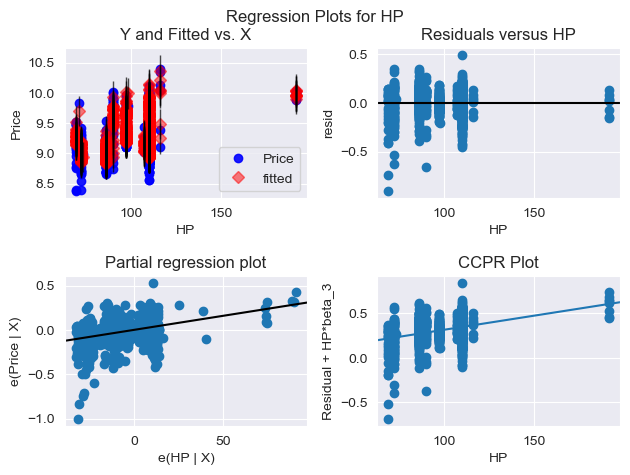

In [31]:
sm.graphics.plot_regress_exog(model, "HP")
plt.show()

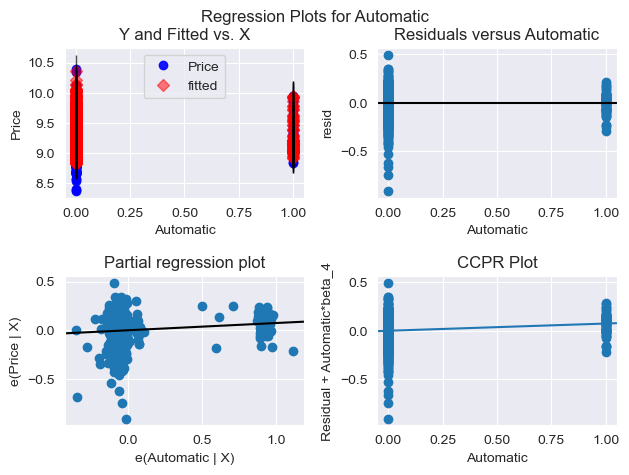

In [32]:
sm.graphics.plot_regress_exog(model, "Automatic")
plt.show()

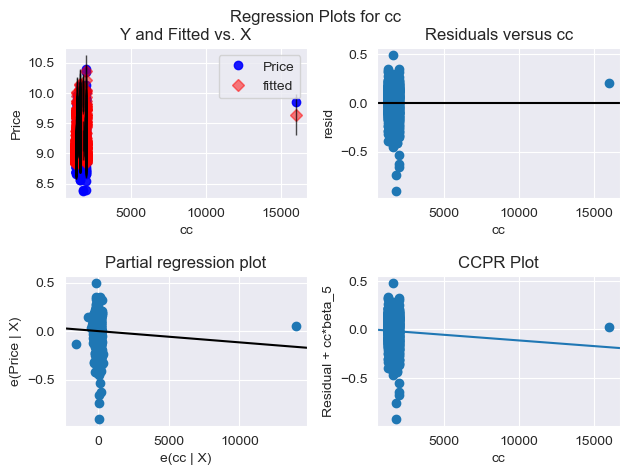

In [33]:
sm.graphics.plot_regress_exog(model, "cc")
plt.show()

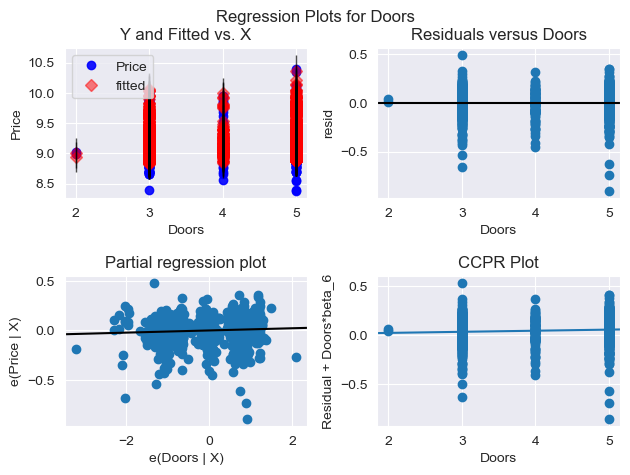

In [34]:
sm.graphics.plot_regress_exog(model, "Doors")
plt.show()

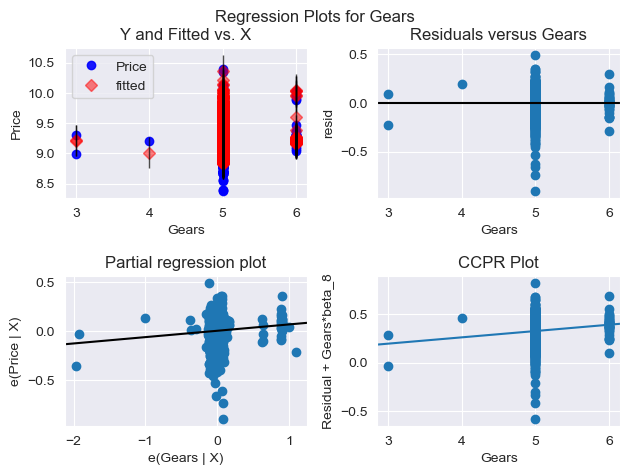

In [35]:
sm.graphics.plot_regress_exog(model, "Gears")
plt.show()

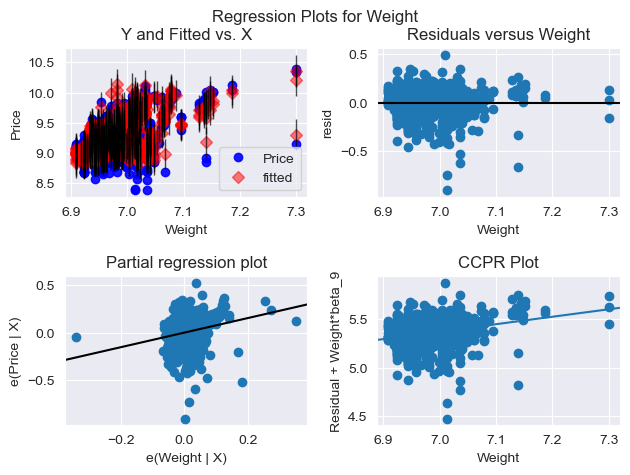

In [36]:
sm.graphics.plot_regress_exog(model, "Weight")
plt.show()

In [37]:
(c, _) = model.get_influence().cooks_distance

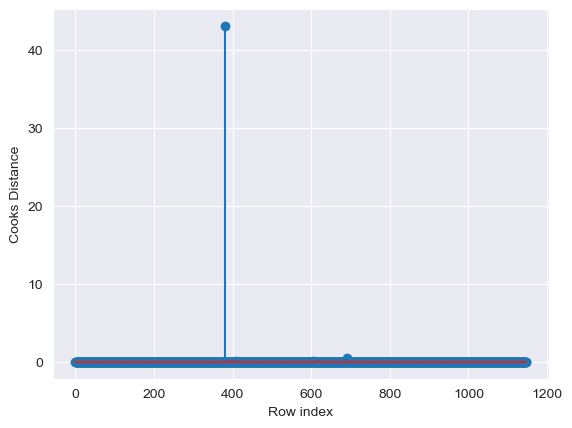

In [38]:
plt.stem(np.arange(len(data_cars_trainset.select_dtypes(include=['number']).drop(columns=['Cylinders']))), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [39]:
(np.argmax(c),np.max(c))

(380, 43.094547859079874)

In [40]:
k = data_cars_trainset.select_dtypes(include=['number']).drop(columns=['Cylinders']).shape[1]
n = data_cars_trainset.select_dtypes(include=['number']).drop(columns=['Cylinders']).shape[0]
leverage_cutoff = 3*((k + 1)/n)
print(leverage_cutoff)

0.02613240418118467


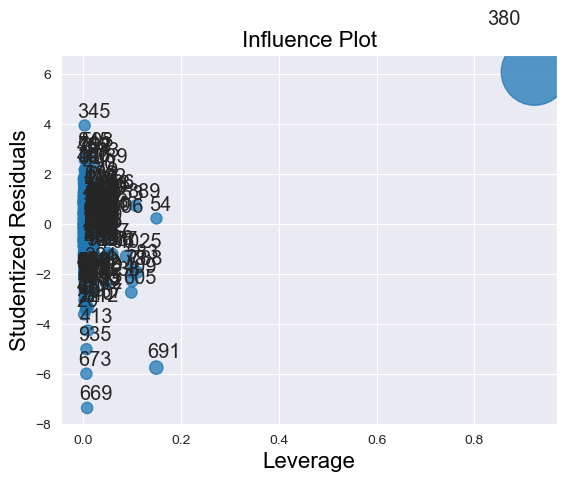

In [41]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [42]:
data_cars_trainset.select_dtypes(include=['number']).drop(columns=['Cylinders'])[data_cars_trainset.select_dtypes(include=['number']).drop(columns=['Cylinders']).index.isin([380])]

,Price,Age_08_04,HP,Automatic,cc,Doors,Gears,KM,Weight
380,9.849612,25,110,1,16000,5,5,9.904487,7.074117


In [43]:
data_cars_drop_influencials = data_cars_trainset.select_dtypes(include=['number']).drop(columns=['Cylinders']).drop(data_cars_trainset.select_dtypes(include=['number']).drop(columns=['Cylinders']).index[[380]],axis=0).reset_index()

In [44]:
data_cars_drop_influencials.head()

,index,Price,Age_08_04,HP,Automatic,cc,Doors,Gears,KM,Weight
0,0,9.159152,62,86,0,1300,5,5,10.990297,6.943122
1,1,9.189729,68,110,0,1600,4,5,11.027914,6.943122
2,2,9.468928,40,110,0,1600,5,5,10.562406,6.985642
3,3,8.771990,75,110,0,1600,5,5,11.531315,6.976348
4,4,9.664659,22,97,0,1400,3,5,10.468801,7.003974


In [45]:
data_cars_drop_influencials.drop(['index'],axis=1, inplace=True)

In [46]:
data_cars_drop_influencials

,Price,Age_08_04,HP,Automatic,cc,Doors,Gears,KM,Weight
0,9.159152,62,86,0,1300,5,5,10.990297,6.943122
1,9.189729,68,110,0,1600,4,5,11.027914,6.943122
2,9.468928,40,110,0,1600,5,5,10.562406,6.985642
3,8.771990,75,110,0,1600,5,5,11.531315,6.976348
4,9.664659,22,97,0,1400,3,5,10.468801,7.003974
...,...,...,...,...,...,...,...,...,...
1142,8.839422,76,110,0,1600,3,5,11.742282,6.957497
1143,8.981053,73,110,0,1600,3,5,11.581602,6.957497
1144,8.846641,80,110,0,1600,5,5,11.180818,6.976348
1145,9.185125,63,86,0,1300,3,5,11.077377,6.928538


In [47]:
final_cars = smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Gears+Weight', data=data_cars_drop_influencials).fit()

In [48]:
(final_cars.rsquared, final_cars.aic)

(0.8242793497324901, -1514.2016537109466)

In [49]:
(c_V, _) = final_cars.get_influence().cooks_distance

**Cook's distance**

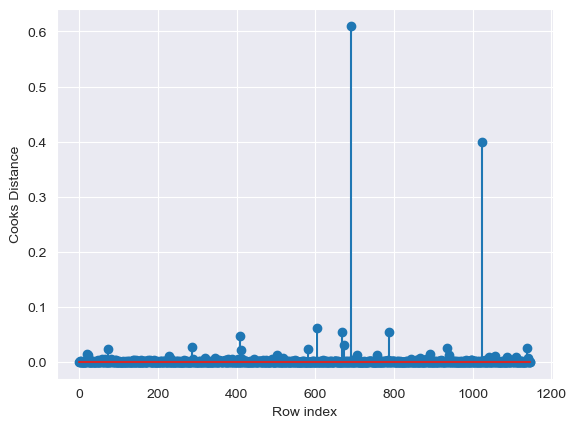

In [52]:
plt.stem(np.arange(len(data_cars_drop_influencials)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In above case all the points are in limit i.e. below 1. Hence no need to delete anything.

**Testing the test data on tained model**

In [54]:
test_data = pd.concat([y_test, X_test], axis=1).reset_index(drop=True)

In [55]:
final_cars.predict(test_data)

0      9.261178
1      9.077456
2      9.084780
3      9.076467
4      9.156657
         ...   
283    9.916818
284    8.972583
285    9.459113
286    9.239610
287    9.187472
Length: 288, dtype: float64

#### 1. What is Normalization & Standardization and how is it helpful?
**Normalization:** is a method of adjusting the values of all features so that they fall within a similar scale — usually between 0 and 1. This helps in making sure that no single feature dominates just because it has larger numbers.
In the Toyota Corolla dataset:
* The KM values (like 150,000) are much bigger than Age values (like 50).
* After normalization, both will be scaled down to values like 0.1 or 0.5, making them easier to compare.

**When to use:**
Normalization is useful when the data doesn't have extreme outliers and when you're using algorithms that work better with small numbers — like neural networks or K-Nearest Neighbors (KNN).

**Standardization** is another way of scaling data, but instead of squeezing values between 0 and 1, it transforms them to have a center value around 0 and spreads them out in a way that considers how far each value is from the average of the column.

In your dataset:

* A car that has been driven a lot more than the average KM will have a higher standardized value.
* A car with average Age will have a value near zero.
* A car with less horsepower than most others will have a negative value.

This makes it easier for the model to understand how far a value is from “normal” or average.

**When to use:**
Standardization is helpful when the data has outliers or when the distribution is not evenly spread. It is commonly used with models like Logistic Regression, Linear Regression, and Support Vector Machines (SVM).

| Concept             | Meaning                                                                   | When to Use                                  |
| ------------------- | ------------------------------------------------------------------------- | -------------------------------------------- |
| **Normalization**   | Brings all values to a similar range, usually between 0 and 1             | When data has no extreme outliers            |
| **Standardization** | Centers values around zero and compares how far they are from the average | When data has outliers or is unevenly spread |


#### 2.What techniques can be used to address multicollinearity in multiple linear regression?
**Multicollinearity** happens when two or more independent variables (features) in a regression model are highly related to each other. This means they give similar information to the model.

For example, in your Toyota Corolla dataset, you might find that:

* Age and KM are related (older cars often have higher kilometers).
* HP and Weight might be related (more powerful cars can be heavier).

When multicollinearity exists:

* The model gets confused about which variable is truly affecting the target (like Price).
* Coefficients can become unstable, leading to poor predictions and misleading interpretations.

**Techniques to Handle Multicollinearity:**

1. Remove One of the Correlated Variables
If two variables are highly related (say, 95% or more), you can remove one of them because it doesn't add much new information.

Example (Toyota dataset):
If Age and KM are strongly related, and KM affects price more clearly, you might drop Age from the model.

2. Use Principal Component Analysis (PCA)
PCA is a technique that creates new features by combining existing ones in a way that removes multicollinearity.

* These new features (called components) are uncorrelated.
* It helps reduce the number of features and simplifies the model.

Note: PCA is a bit more advanced and may not be easy to interpret at first, but it's very useful.

3. Apply Regularization (Ridge or Lasso Regression)
These are special types of regression that add penalties to the coefficients:

* Ridge Regression reduces the impact of multicollinearity by shrinking the coefficients of related variables.
* Lasso Regression can even reduce some coefficients to zero, effectively removing them from the model.

This makes the model more stable and improves prediction accuracy, even when variables are correlated.

4. Check Variance Inflation Factor (VIF)
VIF is a number that tells you how much multicollinearity a variable has.

* A VIF above 5 or 10 indicates a problem.
* If a variable has high VIF, you can remove it or combine it with others.

In your dataset, you could calculate VIF for columns like KM, HP, and Weight, and drop or combine those with high VIF scores.

5. Combine Correlated Features
If two features carry similar information, you can create a new feature by combining them.

Example:
If both Age and KM relate to usage, you can create a new feature like Usage_Index = KM / Age to represent overall wear-and-tear.

| Technique                    | Description                                                        | Easy to Use? |
| ---------------------------- | ------------------------------------------------------------------ | ------------ |
| Remove variables             | Drop one of the highly correlated features                         | Yes        |
| Principal Component Analysis | Combines features to remove correlation                            | Moderate   |
| Ridge/Lasso Regression       | Penalizes large coefficients to reduce overfitting and correlation | Yes        |
| Variance Inflation Factor    | Detects variables causing multicollinearity                        | Yes        |
| Combine features             | Create a new feature that summarizes the information               | Yes        |
